### Student Information
Name: 葉曉融 Ron

Student ID: 106065506

GitHub ID: ron221

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

### Link to the <a href='news_data_mining.ipynb'>First lab session</a>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# my functions
import helpers.data_mining_helpers as dmh

### Data preparation

In [2]:
# load data
amazon_df = pd.read_csv('./sentiment_labelled_sentences/amazon_cells_labelled.txt', header=None, sep='\t')
imdb_df = pd.read_csv('./sentiment_labelled_sentences/imdb_labelled.txt', header=None, sep=' \t')
yelp_df = pd.read_csv('./sentiment_labelled_sentences/yelp_labelled.txt', header=None, sep='\t')

# add column names
column_names = ['comment', 'label']
amazon_df.columns = column_names
imdb_df.columns = column_names
yelp_df.columns = column_names

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
imdb_df[0:10]

,comment,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [4]:
len(imdb_df)

1000

### Exercise 1

In [5]:
# first three samples
amazon_df.head(3)

,comment,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


### Missing Value

In [6]:
amazon_df['comment'].isnull().sum()

0

In [7]:
# check if there exist missing value
print('amazon_df')
dmh.check_missing_values_2(amazon_df)
print('\n')

print('imdb_df')
dmh.check_missing_values_2(imdb_df)
print('\n')

print('yelp_df')
dmh.check_missing_values_2(yelp_df)

## There is no missing value in all three dataframe

amazon_df
comment: 0
label: 0


imdb_df
comment: 0
label: 0


yelp_df
comment: 0
label: 0


### Duplicate Data

In [8]:
print('amazon: ',amazon_df.duplicated('comment').sum())
print('imdb: ', imdb_df.duplicated('comment').sum())
print('yelp: ', yelp_df.duplicated('comment').sum())

amazon:  10
imdb:  3
yelp:  4


In [9]:
# Drop the duplicates
amazon_df.drop_duplicates(keep="first", inplace=True)
imdb_df.drop_duplicates(keep="first", inplace=True)
yelp_df.drop_duplicates(keep="first", inplace=True)

## Data preprocessing

### 1 Sampling

In [10]:
amazon_df_sample = amazon_df.sample(n=100)
amazon_df_sample[0:4]

,comment,label
775,Great bluetooth!.,1
583,It plays louder than any other speaker of this...,1
84,"This item worked great, but it broke after 6 m...",0
586,Battery is holding up well.,1


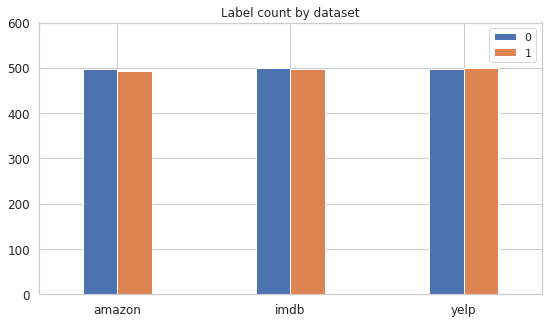

In [11]:
# plot side-by-side comparison of the two label(0, 1) in the three datasets

import seaborn as sns
sns.set(style="whitegrid")

# Concat three dataframe into one.
df_lable_counts = pd.concat([amazon_df.label.value_counts(), imdb_df.label.value_counts(), yelp_df.label.value_counts()],
                      axis = 1)
df_lable_counts.columns = ['amazon', 'imdb', 'yelp']
df_lable_counts.T.plot(kind = 'bar',title = 'Label count by dataset',
                ylim = [0,600],
                rot = 0, fontsize = 12, figsize = (9,5), width=0.4)

### 2 Feature Creation

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ronyeh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# tokenize the comments and store in unigrams column
amazon_df['unigrams'] = amazon_df['comment'].apply(lambda x: dmh.tokenize_text(x))
imdb_df['unigrams'] = imdb_df['comment'].apply(lambda x: dmh.tokenize_text(x))
yelp_df['unigrams'] = yelp_df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [14]:
yelp_df.head(5)

,comment,label,unigrams
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."


### 3 Feature subset selection

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect1 = CountVectorizer()
count_vect2 = CountVectorizer()
count_vect3 = CountVectorizer()
# generate a document-term matrix
amazon_counts = count_vect1.fit_transform(amazon_df.comment)
imdb_counts = count_vect2.fit_transform(imdb_df.comment)
yelp_counts = count_vect3.fit_transform(yelp_df.comment)

In [16]:
len(count_vect2.get_feature_names())

3047

In [17]:
# shape of the matrix
print(amazon_counts.shape)
print(imdb_counts.shape)
print(yelp_counts.shape)

(990, 1847)
(997, 3047)
(996, 2035)


In [18]:
amazon_counts[0:2,:].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# get the feature names of amazon_df
count_vect1.get_feature_names()[0:10]

['10', '100', '11', '12', '13', '15', '15g', '18', '20', '2000']

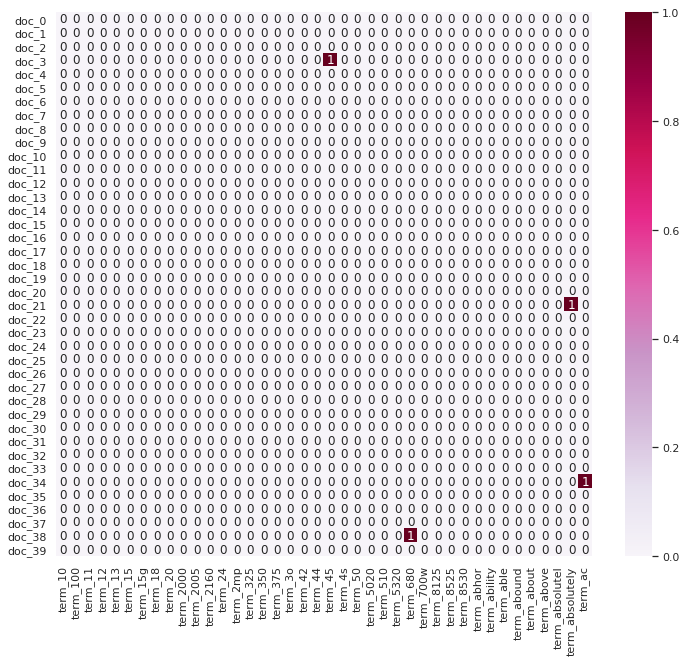

In [20]:
# plot the frequencies of first 20 terms and first 20 documents
plot_x = ["term_"+str(i) for i in count_vect1.get_feature_names()[0:40]]
plot_y = ["doc_"+ str(i) for i in list(amazon_df.index)[0:40]]
plot_z = amazon_counts[0:40, 0:40].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 4 Dimensionality Reduction

In [21]:
# concatenate three dataframe and add the "source" column to differentiate the data.
amazon_df['source'] = 'amazon'
imdb_df['source'] = 'imdb'
yelp_df['source'] = 'yelp'
df_all = pd.concat([amazon_df, imdb_df, yelp_df], axis=0)
# Generate the word frequency matrix for the concatenated dataframe
count_vect = CountVectorizer()
df_all_counts = count_vect.fit_transform(df_all.comment)

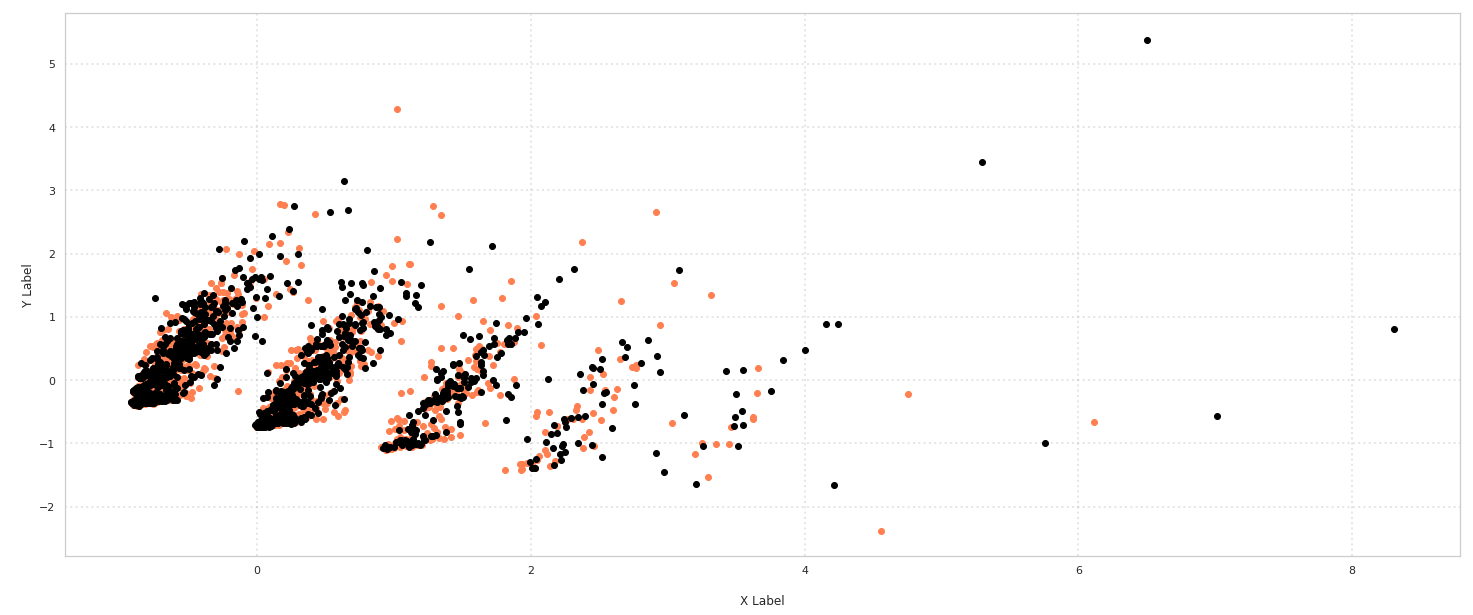

In [22]:
from sklearn.decomposition import PCA
# Reduce the dimention to 2
df_all_reduced_2 = PCA(n_components = 2).fit_transform(df_all_counts.toarray())
df_all_reduced_2.shape
## shape (2983, 2)

import matplotlib.pyplot as plt
%matplotlib inline
col = ['coral', 'black']
labels = [0, 1]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = df_all_reduced_2[df_all['label'] == label].T[0]
    ys = df_all_reduced_2[df_all['label'] == label].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()
#Happy Halloween!!!🎃

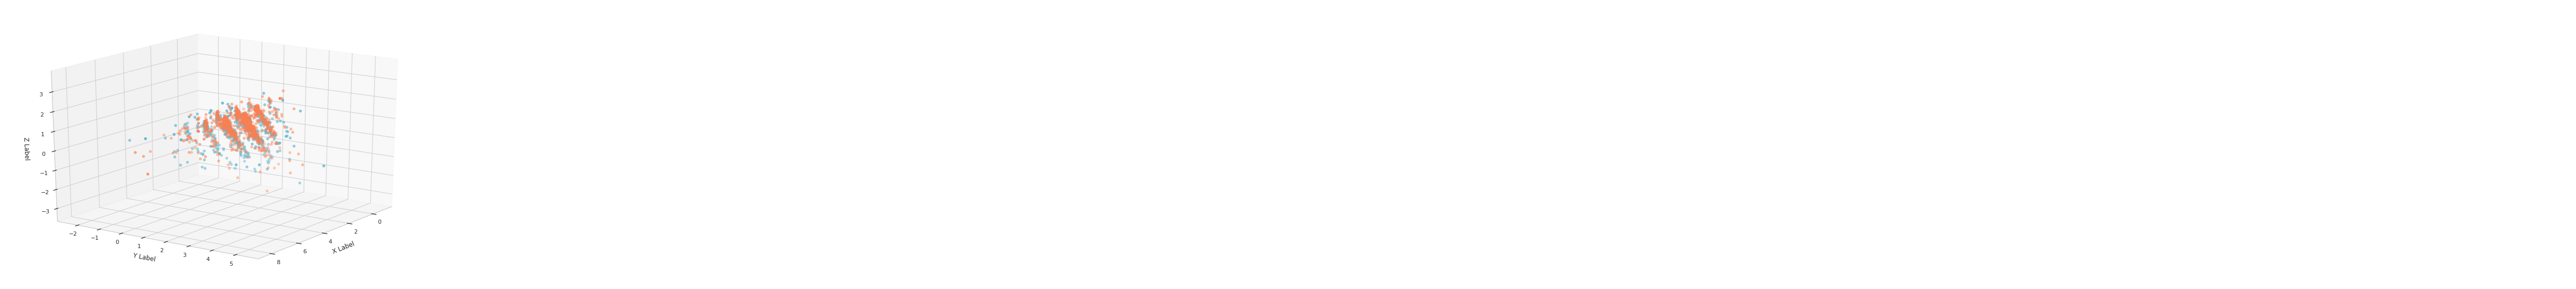

In [23]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Reduce the dimention to 3
df_all_reduced_3 = PCA(n_components = 3).fit_transform(df_all_counts.toarray())
df_all_reduced_3.shape
## shape (2983, 3)
col = ['c', 'coral']
labels = [0, 1]
# plot
ax = plt.figure(figsize=(15,10)).add_subplot(111, projection = '3d') 
ax.view_init(20, 35)
for c, label in zip(col, labels):
    xs = df_all_reduced_3[df_all['label'] == label].T[0]
    ys = df_all_reduced_3[df_all['label'] == label].T[1]
    zs = df_all_reduced_3[df_all['label'] == label].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

### 5 Atrribute Transformation / Aggregation

In [24]:
# Generate term frequency matrix
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_all.comment)
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [25]:
df_all.head(10)

,comment,label,unigrams,source
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",amazon
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",amazon
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",amazon
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",amazon
4,The mic is great.,1,"[The, mic, is, great, .]",amazon
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",amazon
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",amazon
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",amazon
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",amazon
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",amazon


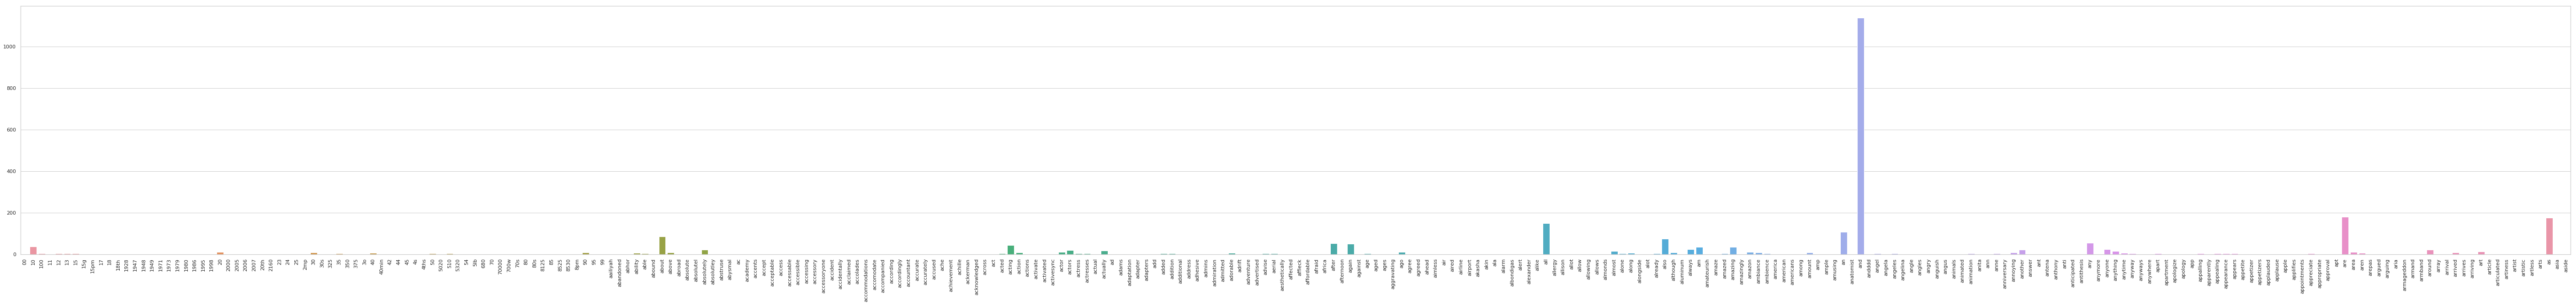

In [26]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')
tfidf = vectorizer.fit_transform(df_all.comment)
print(tfidf.shape)
## result=> (2983, 5155)
vocab = vectorizer.vocabulary_
idf = vectorizer.idf_

(2983, 5155)


#### Using both the TF-IDF and word frequency features, try to compute the similarity between random sentences, and report results. 

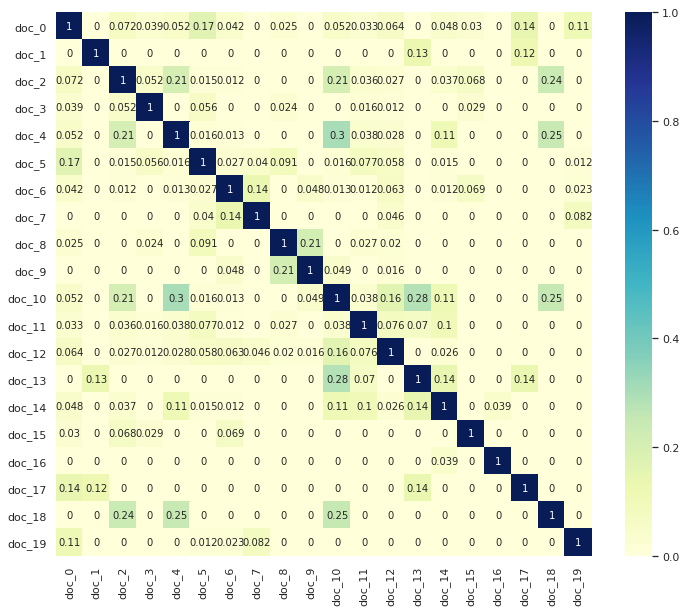

In [28]:
# Use tfidf to generate cosine similarity marix
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix_tfidf = cosine_similarity(tfidf)

# plot
plot_x = ["doc_"+str(i) for i in range(20)]
plot_y = ["doc_"+ str(i) for i in range(20)]
plot_z = cosine_similarity(tfidf)[0:20, 0:20]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True)

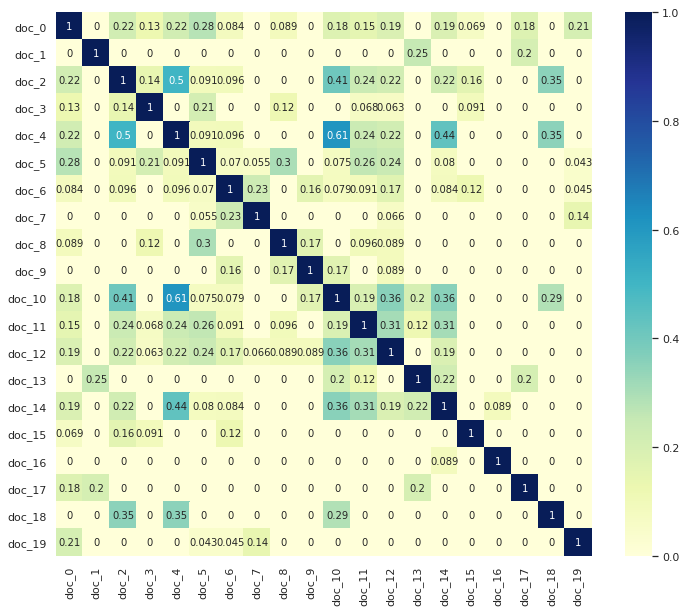

In [29]:
# Use word frequency matrix to generate cosine similarity marix
similarity_matrix_word = cosine_similarity(df_all_counts)
# plot
plot_x = ["doc_"+str(i) for i in range(20)]
plot_y = ["doc_"+ str(i) for i in range(20)]
plot_z = cosine_similarity(df_all_counts)[0:20, 0:20]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True)

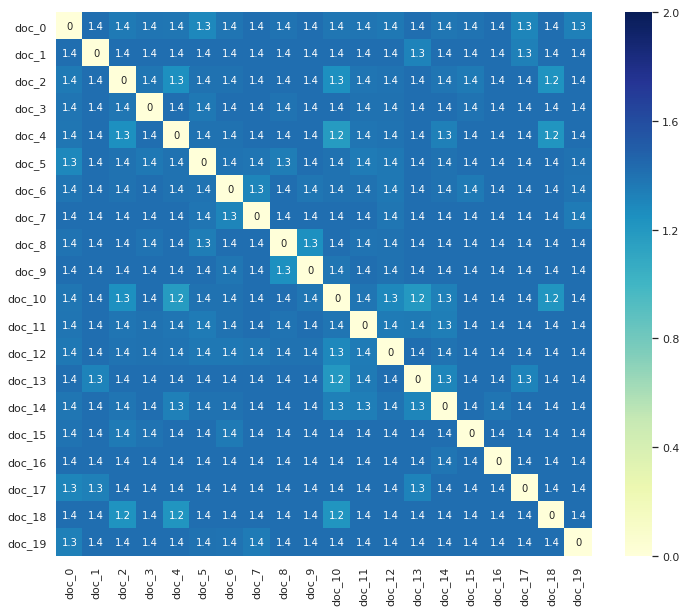

In [30]:
# Use tfidf to generate euclidean distance marix
from sklearn.metrics.pairwise import euclidean_distances
similarity_matrix_euclidean = euclidean_distances(tfidf)

# plot
plot_x = ["doc_"+str(i) for i in range(20)]
plot_y = ["doc_"+ str(i) for i in range(20)]
plot_z = similarity_matrix_euclidean[0:20, 0:20]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=2, annot=True)

### 6 Discretization and Binarization

In [31]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_all.source)
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [32]:
df_all['bin_category'] = mlb.transform(df_all['source']).tolist()

In [33]:
df_all

,comment,label,unigrams,source,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",amazon,"[1, 0, 0]"
4,The mic is great.,1,"[The, mic, is, great, .]",amazon,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",amazon,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",amazon,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",amazon,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",amazon,"[1, 0, 0]"
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",amazon,"[1, 0, 0]"


### Visualization

In [34]:
# term frequency distribution plot
import plotly
import plotly.plotly as py
import helpers.text_analysis as ta
plotly.tools.set_credentials_file(username='ron_yeh', api_key='RkaHzhm9CyIJ2hrv4DfQ')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




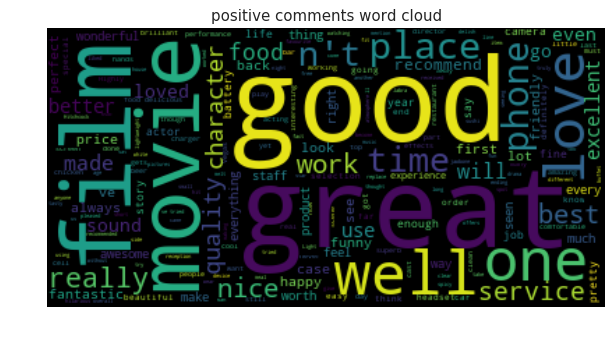

In [35]:
# plot word cloud for positive comments
import helpers.text_analysis as ta
df_sample = df_all.sample(1000)
sample_1 = df_sample[df_sample['label'] == 1]
text = ''
for sentence in sample_1['unigrams']:
    for word in sentence:
        text += ' '
        text += word
ta.plot_word_cloud(text, 'positive comments word cloud')

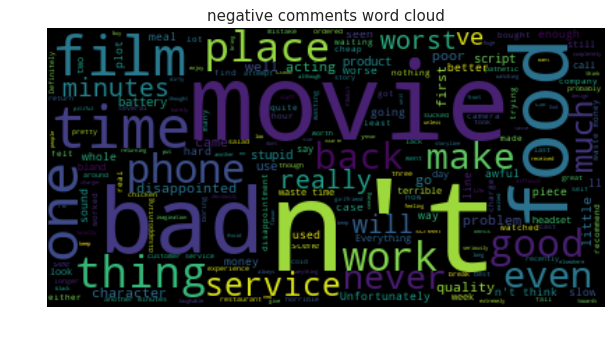

In [36]:
# plot word cloud for positive comments
import helpers.text_analysis as ta
df_sample = df_all.sample(1000)
sample_1 = df_sample[df_sample['label'] == 0]
text = ''
for sentence in sample_1['unigrams']:
    for word in sentence:
        text += ' '
        text += word
ta.plot_word_cloud(text, 'negative comments word cloud')

### Naive Bayes classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict

In [40]:
# compare the performances of multinomial and Gaussian naive Bayes(TFIDF features)
X = tfidf.toarray()
y = df_all['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
mnb = MultinomialNB()
gnb = GaussianNB()

y_pred_mnb = cross_val_score(mnb, X, y, scoring='accuracy', cv=10)
y_pred_gnb = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=10)

print(y_pred_mnb.mean())
print(y_pred_gnb.mean())

# => The multinomial naive Bayes performs better than the Gaussian.

0.8169446252609369
0.7134854438038294


In [41]:
# Use TF-IDF features to build multinominal naive bayes classifier
mnb = MultinomialNB()
X = tfidf.toarray()
y = df_all['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

# Accuracy score
print('Classification accuracy(TF-IDF features):', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classification accuracy(TF-IDF features): 0.8364611260053619
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       392
           1       0.82      0.85      0.83       354

   micro avg       0.84      0.84      0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



In [42]:
# Use word frequency features to build multinominal naive bayes classifier
X = df_all_counts.toarray()
y = df_all['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

# Accuracy score
print('Classification accuracy(word frequency features):', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classification accuracy(word frequency features): 0.8337801608579088
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       395
           1       0.83      0.82      0.82       351

   micro avg       0.83      0.83      0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



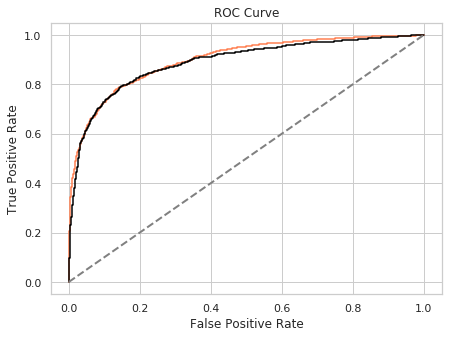

In [49]:
# ROC curve
# compare two classifier built by TF-IDF and word frequency
X_tfidf = tfidf.toarray()
X_wf = df_all_counts.toarray()
y_pred_tfidf = cross_val_predict(mnb, X_tfidf, y, cv=10, method='predict_proba')
y_pred_wf = cross_val_predict(mnb, X_wf, y, cv=10, method='predict_proba')

plt.figure(figsize=(7, 5))
lw = 2

#TF-IDF
fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(y, y_pred_tfidf[:, 1])
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)
plt.plot(fpr_tfidf, tpr_tfidf, color='coral')

#Word frequency
fpr_wf, tpr_wf, thresholds_wf = roc_curve(y, y_pred_wf[:, 1])
roc_auc_wf = auc(fpr_wf, tpr_wf)
plt.plot(fpr_wf, tpr_wf, color='black')
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# => the results are really similar.